# **RNN Introduction**


## Importing required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/traffic_RNN.csv',parse_dates=['DateTime'])
df.head(30)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


## Visualization

In [16]:
df['Junction'].unique()

array([1, 2, 3, 4])

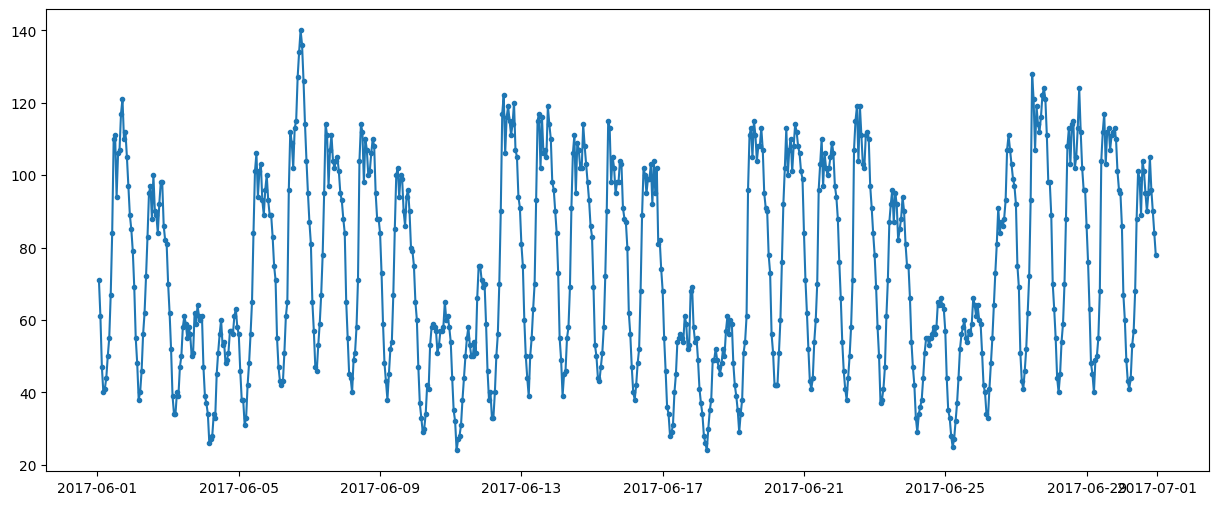

In [17]:
df_specific = df[(df['DateTime']>'2017-06') & (df['Junction'] == 1) ]
plt.figure(figsize=(15, 6))
plt.plot(df_specific['DateTime'], df_specific['Vehicles'], marker='.')
plt.show()

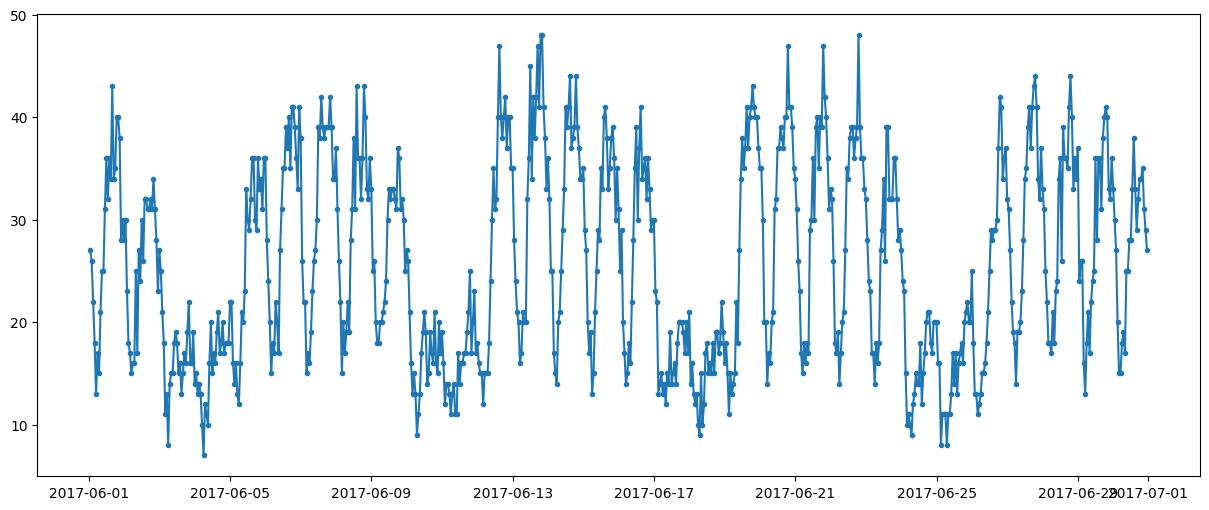

In [18]:
df_specific = df[(df['DateTime']>'2017-06') & (df['Junction'] == 2) ]
plt.figure(figsize=(15, 6))
plt.plot(df_specific['DateTime'], df_specific['Vehicles'], marker='.')
plt.show()

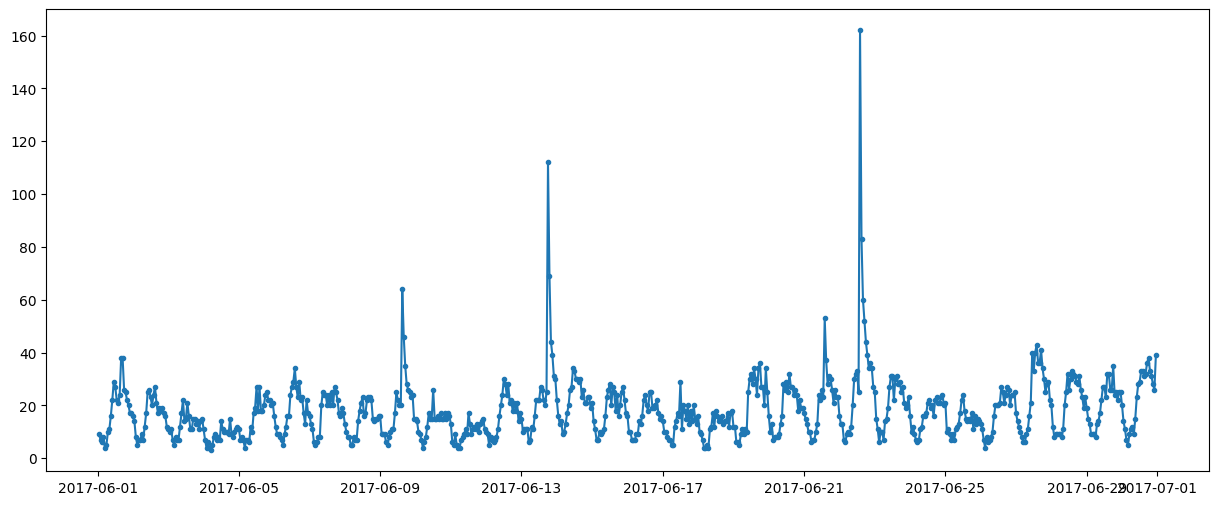

In [19]:
df_specific = df[(df['DateTime']>'2017-06') & (df['Junction'] == 3) ]
plt.figure(figsize=(15, 6))
plt.plot(df_specific['DateTime'], df_specific['Vehicles'], marker='.')
plt.show()

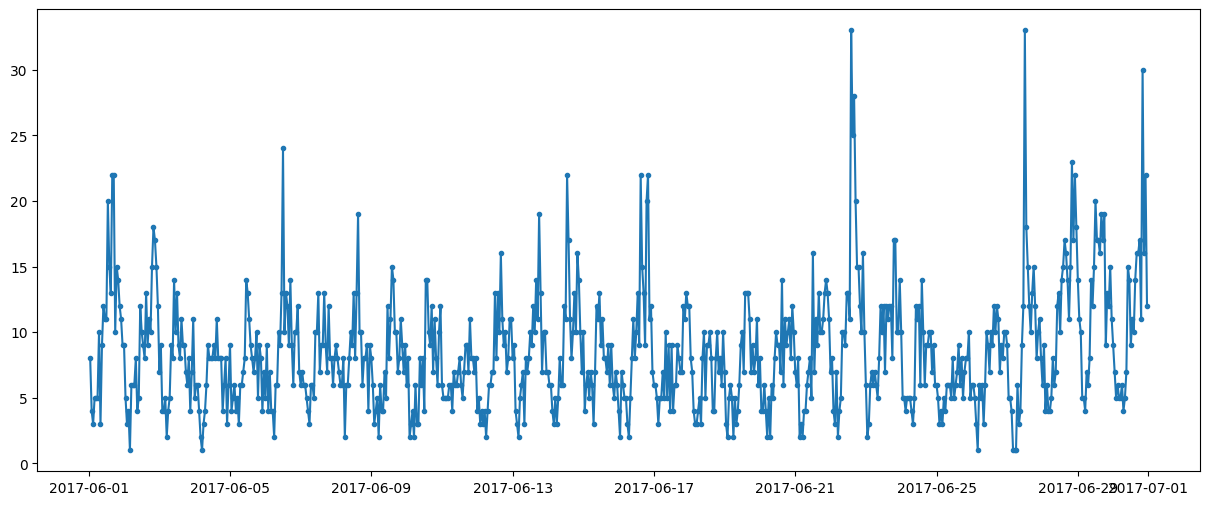

In [20]:
df_specific = df[(df['DateTime']>'2017-06') & (df['Junction'] == 4) ]
plt.figure(figsize=(15, 6))
plt.plot(df_specific['DateTime'], df_specific['Vehicles'], marker='.')
plt.show()

## Split the data into train and test

In [36]:
from sklearn.model_selection import train_test_split
df.drop(columns='ID',inplace=True)
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df.drop(columns='DateTime',inplace=True)
df.head()

,Junction,Vehicles,year,month,day,hour
0,1,15,2015,11,1,0
1,1,13,2015,11,1,1
2,1,10,2015,11,1,2
3,1,7,2015,11,1,3
4,1,9,2015,11,1,4


In [38]:
from sklearn.model_selection import train_test_split
X = df.drop('Vehicles', axis=1)
y = df['Vehicles']
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
#no need for preprocessing since junction is 1-4

In [46]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [39]:
#create sequence
seq_size = 24*7  #rows differ by 1 hour each, so this size for a week =168 row

In [44]:
type(X_train)

numpy.ndarray

In [47]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

## Modeling


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN




#model arc
model = Sequential([
    SimpleRNN(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(units=32),
    Dense(units=1)
])

#compile
model.compile(loss='mean_squared_error',optimizer='adam')

#fit
model.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=20,
          batch_size=32,
          )

Epoch 1/20
963/963 [==============================] - 11s 8ms/step - loss: 657.5804 - val_loss: 267.5029
Epoch 2/20
963/963 [==============================] - 5s 6ms/step - loss: 438.3940 - val_loss: 86.4298
Epoch 3/20
963/963 [==============================] - 7s 8ms/step - loss: 237.6971 - val_loss: 85.8827
Epoch 4/20
963/963 [==============================] - 6s 6ms/step - loss: 211.6712 - val_loss: 89.4601
Epoch 5/20
963/963 [==============================] - 7s 7ms/step - loss: 204.5889 - val_loss: 90.4183
Epoch 6/20
963/963 [==============================] - 7s 7ms/step - loss: 202.2855 - val_loss: 91.0585
Epoch 7/20
963/963 [==============================] - 6s 6ms/step - loss: 201.0512 - val_loss: 86.9611
Epoch 8/20
963/963 [==============================] - 7s 7ms/step - loss: 199.2701 - val_loss: 91.5198
Epoch 9/20
963/963 [==============================] - 5s 6ms/step - loss: 198.6497 - val_loss: 90.0107
Epoch 10/20
963/963 [==============================] - 7s 7ms/step - lo

## Visualization of results
